## <b><center>ПРАКТИКА</center></b>



# Подготовка окружения для выполнения задания
В ходе выполнения задний нам понадобятся файлы с Google диска.
Для этого нам нужно подключить диск где расположены файлы для выполнения задания:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Для удобства скопируем материалы в необходимы папки:

In [ ]:
!cp -r ./drive/MyDrive/markup\ augmentation\ practice/utils ./utils
!cp -r ./drive/MyDrive/markup\ augmentation\ practice/data ./data

И установим необходимые библиотеки для работы:

In [ ]:
#!pip install -r ./drive/MyDrive/markup\ augmentation\ practice/requirements.txt
!pip install -r ./data/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

Все что нам осталось сделать это перезапустить среду выполнения:
Среда выполнения->Перезапустить среду выполнения

# <b>Тема:</b> Работа с данными для задачи детекции (инструменты разметки, синтез данных, методы аугументации) 

## <b>План занятия:</b>
    1. Рассмотрим открытые разметчики и кастомизируем один из них под свою задачу
    2. Создадим кастомную разметку и научимся читать ее
    3. Разберем инструментарий albumentations
    4. Разберем пример синтеза изображения на базе 3D фреймворка Blender 

### <b> <center>1.  Открытые разметчики и кастомизация</center></b>

Как мы знаем из лекции существует не мало бесплатных разметчиков среди них такие популярные как:
#### <center>[CVAT](https://github.com/openvinotoolkit/cvat)</center>
<center><img src="https://drive.google.com/uc?id=1PADVV7J373cSlk0SmetL6J_NDm8JQC2T" style="width:720;height:500px"/></center>

#### <center>[LabelMe](https://github.com/wkentaro/labelme)</center>
<center><img src="https://drive.google.com/uc?id=18VHrDzO1BMMRdN9s26iT13B95jvzTVk_" style="width:720;height:500px"/></center>

#### <center>[LabelImg](https://github.com/tzutalin/labelImg)</center>
<center><img src="https://drive.google.com/uc?id=1sP6-1ohC75CtiLAl-cVcCmx_HRlh-oXo" style="width:720;height:500px"/></center>


#### <center>[VGG VIA Tool](https://www.robots.ox.ac.uk/~vgg/software/via/#:~:text=VGG%20Image%20Annotator%20is%20a,require%20any%20installation%20or%20setup.)</center>
<center><img src="https://drive.google.com/uc?id=1QpcptlT5GP5DpI8Vgw9w2yzQnmJobzTF" style="width:720;height:500px"/></center>

Разберем один из них: <b>VGG Image Annotator tool </b><br>
&emsp;Для этого перейдем в разметчик по ссылке: https://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html .
Особенность данного разметчика в том, что он полностью кастомизируем под задачу и имеет возможность запускаться локально. Пример ниже:

In [ ]:
# import http.server
# import socketserver
# from multiprocessing import Process

# ###### Constants #####################
# index_path = "path/to/vgg_ann_html" # путь к файлу разметчика  html (по умолчанию index.html) 

# # Функция запуска сервера по адресу http://localhost:<port>
# def start_server(port: int=29639) -> None:
#     # Создаем custom обработчик и передаем путь к файлу index.html
#     class Handler(http.server.SimpleHTTPRequestHandler):
#         def __init__(self, *args, **kwargs):
#             super().__init__(*args, directory=index_path, **kwargs)
            
#     handler = Handler
#     # Запускаем сервер
#     with socketserver.TCPServer(("", port), handler) as httpd:
#         print("Serving at address:127.0.0.1 and port: ", port)
#         httpd.serve_forever()

# # Создаем и запускаем отдельный процесс для работы сервера
# server_process=Process(target=start_server)
# server_process.start()

Для запуска скачиваем <a href="https://drive.google.com/file/d/1tMLFykUirfmwqI1h6vZpzvDAEQcjxeug/view?usp=share_link"> VGG Annotator</a>, распаковываем и запускаем в терминале из папки webserver_python3.py


#### <center> <b>Кастомизация разметчика</b></center>
Перед началом кастомизации разметчика давайте скачаем архив <a href="https://drive.google.com/file/d/1QCNzBoxllRZH3ngH9nUAg12T0p-87nQq/view?usp=share_link"> Dataset</a> - мини датасет из 5 картинок. 
Далее переходим в <a href="https://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html"> VGG Annotator external</a> и:
1. Загружаем изображения: <b><i> local/path/to/images</i></b><br>
 - В меню: Project->Add local files. Затем выбрать путь: local/path/to/images. Нажать Ctrl+A - выделить все изображения и Open в конце
<br>
2. В Region Shape выделить прямоугольник, что будет сигнализировать разметку BoundingBox
<br>
3. Ниже в Attributes необходимо кастомизировать атрибуты, которые будут присваиваться размеченному BoundingBox:<br>
 - В поле attribute name - ввести название атрибута разметки название класса: classname. Нажать +
 - Ниже в Type выбрать radio - для добавления в разметку выбора из нескольких названий. Ниже в Add new option id добавить названия: car и plate
4. Разметить выделив машину как класс car и номер машина как класс plate. При разметке можно использовать колесико мыши + Ctrl для приближения и отдаления.<br>
<b><i><font color="purple">&emsp;&emsp;Задание: <br>&emsp;&emsp;&emsp;&emsp;1. Разметить оставшиеся изображения с машинами и номерами<br>&emsp;&emsp;&emsp;&emsp;2. Добавить атрибут разметки с названием: importance и Type: dropdown, добавив 3 поля: 0.0, 0.5, 1.0</font></i></b>

5. Сохранение результатов: <b><i> local/path/to/annotations_json</i></b>
 - В меню Annotations->Export Annotations(as json) и сохранить в папке. По умолчанию вся разметка сохраняется в одном файле
 - Предварительно разметку можно посмотреть: Annotations->Preview Annotations

### <b> <center>2.  Чтение кастомной разметки</center></b>
Прочитаем из единого файла аннотации данные разметки и сконвертируем разметку в различные форматы (по умолчанию разметка в формате COCO <i>[xmin, ymin, width, height]</i>):<br>
        1. <b>pascal_voc</b> - <i>[xmin, ymin, xmax, ymax]</i>;<br>
        2. <b>albumentations</b> - <i>[x'min, y'min, x'max, y'max], где символ <b>[ ' ]</b> обозначает нормализацию к 1</i>;<br>
        3. <b>yolo</b> - <i>[x'center, y'center, width', height'], где символ <b>[ ' ]</b> обозначает нормализацию к 1</i>.<br>
        <b>Где:</b><br>
        <b><i>
                &emsp;&emsp;xmin - крайняя левая координата boundingbox;<br>
                &emsp;&emsp;ymin - крайняя верхняя координата boundingbox;<br>
                &emsp;&emsp;xmax - крайняя правая координата boundingbox;<br>
                &emsp;&emsp;ymax - крайняя нижняя координата boundingbox;<br>
                &emsp;&emsp;width - ширина boundingbox в пикселях;<br>
                &emsp;&emsp;height - высота boundingbox в пикселях;<br>
                &emsp;&emsp;' - нормализация к 1 (например: x'min - крайняя левая координата boundingbox нормализованная к 1)
        </i></b><br>
        <b><i><font color="purple">&emsp;&emsp;Задание: <br> 
                &emsp;&emsp;&emsp;&emsp;1. Дописать функцию преобразования convert_to_pascal_voc(xmin=..., ymin=..., width=..., height=...)<br>
                &emsp;&emsp;&emsp;&emsp;2. Дописать функцию преобразования convert_to_albumentation(xmin=..., ymin=..., width=..., height=...)<br>
                &emsp;&emsp;&emsp;&emsp;3. Дописать функцию преобразования convert_to_yolo(xmin=..., ymin=..., width=..., height=...)<br>
        </font></i></b><br>
        Формулы нормализации:
        $$ x' = \large\frac{x}{width_f},\normalsize \\ $$

$$ y' = \large\frac{y}{height_f}, \\ $$

$$ width' = \large\frac{width}{width_f}, \\ $$

$$ height' = \large\frac{height}{height_f},\normalsize \\ $$ 
    
где:
$ x $ - координата по горизонтали; <br>
$ x' $ - нормализованная координата $ x $; <br>
$ y $ - координата по вертикали; <br>
$ y' $ - нормализованная координата $ y $; <br>
$ width $ - ширина в пикселях; <br>
$ height $ - высота в пикселях; <br>
$ width' $ - нормализованная ширина; <br> 
$ height' $ - нормализованная высота; <br>
$ width_f $ - ширина изображения в пикселях; <br>
$ height_f $ - высота изображения в пикселях. <br>
        <center><img src="https://drive.google.com/uc?id=1H26gqkFnbqBvLDuJIVRD4ij-DLUqQFHi" style="width:720;height:500px"/></center>

In [ ]:
from utils.utests import *

@tpascal
def convert_to_pascal_voc(xmin: int=..., ymin: int=..., width: int=..., height: int=...)-> tuple:
    xmin = xmin
    ymin = ymin
    xmax = xmin + width
    ymax = ymin + height
    return (xmin, ymin, xmax, ymax)

In [ ]:
from utils.utests import *
@talbum
def convert_to_albumentation(xmin: int=..., ymin: int=..., width: int=..., height: int=..., frame_width: int=..., frame_height: int=...)-> tuple:
    xmin_normalized = xmin / frame_width
    ymin_normalized = ymin / frame_height
    xmax_normalized = (xmin + width) / frame_width
    ymax_normalized = (ymin +  height) / frame_height
    return (xmin_normalized, ymin_normalized, xmax_normalized, ymax_normalized)

In [ ]:
from utils.utests import *

@tyolo
def convert_to_yolo(xmin: int=..., ymin: int=..., width: int=..., height: int=..., frame_width: int=..., frame_height: int=...)-> tuple:
    xcenter_normalized = (xmin+(width/2))/frame_width
    ycenter_normalized = (ymin+(height/2))/frame_height
    width_normalized = width/frame_width
    height_normalized = height/frame_height
    return (xcenter_normalized, ycenter_normalized, width_normalized, height_normalized)

In [ ]:
##### Запустить для проверки себя
def convert_to_pascal_voc(xmin: int, ymin: int, width: int, height: int)-> tuple:
    xmax = xmin + width
    ymax = ymin + height
    return (xmin, ymin, xmax, ymax)

def convert_to_albumentation(xmin: int, ymin: int, width: int, height: int, frame_width: int, frame_height: int)-> tuple:
    xmin_normalized = xmin/frame_width
    ymin_normalized = ymin/frame_height
    xmax_normalized = (xmin + width)/frame_width
    ymax_normalized = (ymin + height)/frame_height
    return (xmin_normalized, ymin_normalized, xmax_normalized, ymax_normalized)

def convert_to_yolo(xmin: int, ymin: int, width: int, height: int, frame_width: int, frame_height: int)-> tuple:
    xcenter_normalized = (xmin + width/2)/frame_width
    ycenter_normalized = (ymin + height/2)/frame_height
    width_normalized = width/frame_width
    height_normalized = height/frame_height
    return (xcenter_normalized, ycenter_normalized, width_normalized, height_normalized)

Преобразование разметки из формата JSON в формат YOLO  и сохранением под именами изображения в txt формате

In [ ]:
import json
import cv2


######## Constants ############
annotations_path = '/content/data/dataset/annotations'
images_path = '/content/data/dataset/images'
classes_id = {'car':"0", 'plate':"1"}
###############################

def convert_markup(annotations_path: str=annotations_path, debug: bool= True)-> None:
    # Чтение из файла c разметкой JSON
    with open(f'{annotations_path}/ant3.json') as json_file:
        data = json.load(json_file)

    # Проход по разметке каждого изображения
    for image_key, image_data in data.items():
        # Считывание названия изображения
        image_name = image_data["filename"]

        image = cv2.imread(f'{images_path}/{image_name}')
        # Получение размеров изображения
        height, width, channel = image.shape

        # Получаем все области разметки и проходимся по ним
        regions = image_data["regions"]
        markup_string = ""
        if debug:
            print("="*60)
            print(f"{image_name=}")
        
        for region in regions:
            # Получаем данные BoundingBox
            xmin = int(region["shape_attributes"]["x"])
            ymin = int(region["shape_attributes"]["y"])
            region_width = int(region["shape_attributes"]["width"])
            region_height = int(region["shape_attributes"]["height"])

            # Получаем значение атрибутов области ("classname", "importance")
            classname = region["region_attributes"]["classname"]
            importance = region["region_attributes"]["importance"]
            if debug:
                print(f"{xmin=} {ymin=} {region_width=} {region_height=} {classname=} {float(importance)=}")
                
            # Получение списка нормализованных в формате YOLO значений
            normalized_boundingbox = list(convert_to_yolo(xmin, ymin, region_width, region_height, width, height))
            markup_string = f"{markup_string}{classes_id[classname]} {' '.join(map(str, normalized_boundingbox))}\n"
        # Запись полученной строки с разметкой в файл
        with open(f'{annotations_path}/{image_name.split(".")[0]}.txt', 'w') as fann:
            fann.write(markup_string)
            
                
convert_markup(debug=False)

0 0.5494949494949495 0.6169064748201439 0.28484848484848485 0.37410071942446044

0 0.5494949494949495 0.6169064748201439 0.28484848484848485 0.37410071942446044
1 0.5515151515151515 0.5926258992805755 0.09898989898989899 0.048561151079136694

0 0.5494949494949495 0.6169064748201439 0.28484848484848485 0.37410071942446044
1 0.5515151515151515 0.5926258992805755 0.09898989898989899 0.048561151079136694
0 0.36767676767676766 0.5251798561151079 0.11717171717171718 0.1474820143884892

0 0.5494949494949495 0.6169064748201439 0.28484848484848485 0.37410071942446044
1 0.5515151515151515 0.5926258992805755 0.09898989898989899 0.048561151079136694
0 0.36767676767676766 0.5251798561151079 0.11717171717171718 0.1474820143884892
1 0.36262626262626263 0.5530575539568345 0.03434343434343434 0.02697841726618705

0 0.5494949494949495 0.6169064748201439 0.28484848484848485 0.37410071942446044
1 0.5515151515151515 0.5926258992805755 0.09898989898989899 0.048561151079136694
0 0.36767676767676766 0.5251798

### <b> <center>3.  Инструментарий Albumentations</center></b>
Albumentations - представляет собой готовый инструментарий для аугментации изображений с возможностью сохранения актуальности разметки. Позволяет работать с форматами разметки: Pascal_VOC, COCO, YOLO, Albumentations.<br>
&emsp;&emsp;Для работы с Albumentations необходимо построить pipeline, проходя через который происходит аугментация изображения.
<center><img src="https://drive.google.com/uc?id=19Feh0TXIi7hydRnN8IF-Tm4OuSDJNq-m" style="width:720;height:500px"/></center><br>
&emsp;&emsp;На рисунке изображение кошки проходит через пайплайн на выходе возможен один из 4 вариантов. Каждый проход при этом сопровождается вероятностью (probability) того, что после прохода изображения будет аугментировано.<br>
&emsp;&emsp;Для создания pipeline необходимо создать экземпляр класса Compose.<br>
Пример построения pipeline albumentations:

In [ ]:
import albumentations as A
import cv2
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import ipyplot
import numpy as np

########## Constants ##################
images_count = 10 # Количество аугментированных изображений
images_path = '/content/data/dataset/images' # Путь к изображениям
#######################################

# Чтение изображения и перевод в формат RGB
image = cv2.imread(f"{images_path}/cars4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def augmentate_image(image: np.ndarray=..., transform: A.Compose=..., images_count: int=2, image_width: int=300)->None:
    if transform is ...:
        # Построение pipeline albumentations для 
        # задачи классификации (без учета разметки)
        transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.8),
            A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
            A.Blur(blur_limit=3),
            A.MedianBlur(blur_limit=3, p=0.9),
            A.RandomBrightnessContrast(p=0.6),
            A.OpticalDistortion(p=0.5)
        ])
        
    
    transformed_images = list()

    # Получение аугментированных изображений
    for index in range(images_count):
        transformed_images.append(transform(image=image)["image"])

    # Отображение полученных изображений
    ipyplot.plot_images(transformed_images, max_images=images_count, img_width=image_width)

augmentate_image(image, images_count=12)

При построении pipeline albumentations имеются такие аугментаторы как:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - HorizontalFlip - отражение по горизонтали<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - ShiftScaleRotate - одновременное смещение масштабирование и вращение<br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - RandomBrightness - случайное изменение яркости <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - [и многие другие](https://albumentations.ai/docs/api_reference/augmentations/)
<br>
<b><i><font color="purple">&emsp;&emsp;Задание:<br> 
        &emsp;&emsp;&emsp;&emsp;1. Дописать функцию get_album_pipeline для получения albumentations pipeline.<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;При написании использовать аугментации: CLAHE, ColorJitter, GaussianBlur, HorizontalFlip, ShiftScaleRotate, [любые другие](https://albumentations.ai/docs/api_reference/augmentations/)<br>
</font></i></b><br>

In [ ]:
from utils.utests import talbumc
@talbumc
def get_album_pipeline()->A.Compose:
    return A.Compose([                        
                        A.HorizontalFlip(p=0.5),
                        A.CLAHE(clip_limit=(1, 100)),
                        A.ColorJitter(p=0.2,
                                      brightness=(0.5, 2), 
                                      contrast=(0.5, 2), 
                                      saturation=(0.5, 2)),
                      A.GaussianBlur(p=0.2), 
                      A.ShiftScaleRotate(p=0.5, shift_limit_x=(-0.06, 0.06), 
                                         shift_limit_y=(-0.06, 0.06), scale_limit=(-0.1, 0.1), 
                                         rotate_limit=(-30, 30))
    ])

augmentate_image(image, images_count=15, transform=get_album_pipeline())

In [ ]:
from utils.augmentation_widget import AlbumentationWidget
import cv2

########## Constants ##################
images_path = '/content/data/dataset/images' # Путь к изображениям
#######################################

# Чтение изображения и перевод в формат RGB
image = cv2.imread(f"{images_path}/cars5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Создаем виджет для создания пайплайна albumentation
albu_widget = AlbumentationWidget(image=image, debug=True)
augmentatrion_widget, create_button_widget, output = albu_widget()

# Выводим виджет
display(augmentatrion_widget)
display(create_button_widget)
display(output)

Button(button_style='success', description='Аугментировать', icon='check', style=ButtonStyle(), tooltip='Аугме…

Output()

[Демо от albumentations](https://demo.albumentations.ai/)

&emsp;&emsp;Как было отмечено ранее особенность albumentations в том, что его инструментарий позволяет работать с разметкой и изменять ее в соответствии с аугментацией:<br>
<center><img src="https://drive.google.com/uc?id=1029uA5IDjADtw00xkITxuSi41Xmcxk_c" style="width:720;height:500px"/></center><br>
&emsp;&emsp;На рисунке видно, что при подаче в экземпляр класса A.Compose (transform на рисунке) bboxes в определенном формате (справа сверху рисунка), получают словарь (transformed на рисунке), где ключ 'image' - возвращает аугментированное изображение, а 'bboxes' - все boundingbox с соответствующими изменениями и названиями классов.<br>
Пример аугментации при помощи albumentations с сохранением разметки:

In [ ]:
## Пример albumentations pipeline с учетом разметки в формате pascal_voc: [xmin, ymin, xmax, ymax]:
#     transform = A.Compose([
#         A.HorizontalFlip(p=0.5),
#         A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
#         A.Blur(blur_limit=3),
#         A.MedianBlur(blur_limit=3, p=0.9),
#         A.RandomBrightnessContrast(p=0.6),
#         A.RandomCrop(500, 700, p=1.0)
#         ], bbox_params=A.BboxParams(format='pascal_voc'))

In [ ]:
from utils.augmentation_widget import AlbumentationPipelineWidget

# Зануляем transform 
transform = None

# Создаем виджет для создания пайплайна albumentation
albu_pipe_widget = AlbumentationPipelineWidget()
aug_pipe_widget = albu_pipe_widget()
display(aug_pipe_widget)

In [ ]:
import random
import cv2
from utils.markup_utils import visualize_bbox, convert_from_yolo

########## Constants ##################
annotations_path = '/content/data/dataset/annotations' # Путь к файлам разметки
images_path = '/content/data/dataset/images' # Путь к изображениям
BOX_COLOR = (255, 0, 255) # фиолетовый цвет - boundingboxes не аугментированного изображения
TEXT_COLOR = (255, 255, 255) # белый цвет -  текст
classnames = {'0':'car', '1':'plate'}
AUG_BOX_COLOR = (0, 0, 255) # синий цвет - boundingboxes аугментированного изображения
debug = False # флаг отладки
#######################################

# Получаем пайплайн аугментации
transform = albu_pipe_widget.get_transform()

# Чтение изображения и создание копии для нанесения разметки после аугментации
image = cv2.imread(f"{images_path}/car2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
augmented_image = image.copy()

# Получение высоты и ширины изображения для пересчета координат
frame_height, frame_width, _ = image.shape

# Чтение разметки из файла
with open(f"{annotations_path}/car2.txt", 'r') as fann:
    markups_lines = fann.readlines()

# Нанесение разметки на исходное изображение и создание списка формата:
# [[xmin, ymin, xmax, ymax, classname], ... ]
markups = list()
for markup in markups_lines:
    markup = markup.replace('\n', '').split(' ')
    bbox = list(convert_from_yolo(*markup[1:], frame_width, frame_height))
    markups.append([*bbox, classnames[markup[0]]])
    image = visualize_bbox(image, list(convert_from_yolo(*markup[1:], frame_width, frame_height)), classnames[markup[0]])
    
if debug:
    print(markups)
    print(albu_pipe_widget.get_transform())

# Получение аугментированного изображения и измененных boundingboxes
transformed = transform(image=augmented_image, bboxes=markups)
augmented_image = transformed['image']

# Визуализация измененных boundingboxes на аугментированное изображения
for bbox in transformed['bboxes']:
    augmented_image = visualize_bbox(augmented_image, bbox[:-1], bbox[-1], color=AUG_BOX_COLOR)

# Отображение полученных изображений
ipyplot.plot_images([image, augmented_image], ["Исходное изображение:", "Аугментированное изображение:"], max_images=2, img_width=480)

In [ ]:
transformed = transform(image=augmented_image, bboxes=markups)

[(402.0, 239.0, 685.0, 447.0, 'car'),
 (497.0, 316.0, 595.0, 342.0, 'plate'),
 (306.0, 250.0, 421.0, 332.0, 'car'),
 (342.0, 300.0, 376.0, 315.0, 'plate'),
 (0.0, 231.00000000000003, 150.0, 359.0, 'car'),
 (125.00000000000001, 243.0, 242.0, 332.0, 'car'),
 (712.0, 211.00000000000003, 987.0, 307.0, 'car'),
 (2.0, 311.0, 19.0, 327.0, 'plate'),
 (150.0, 307.0, 163.0, 312.0, 'plate')]

Для построение более глубоких pipeline в albumentations предусмотрен оператор случайного выбора одного из возможных аугментаторов - OneOf. OneOf - это оператор, который с определенной вероятностью (p2 ниже в коде) применит/не применит один из включенных в него аугментаторов (A.Blur, A.GaussNoise в коде).
Работает это так: 
<br>
&emsp;&emsp;Когда в общем pipeline albumentations  доходит очередь до OneOf и с вероятностью p2 принимается решение применить один из включенных в него аугментаторов, производиться перевод в одно вероятностное пространство вероятностей каждого из аугментаторов (p3 и p4 ниже в коде), таким образом сумма вероятностей применения одного из  аугментаторов равна 1.<br>
Перевод производиться по следующей формуле:
<br>
$
\hspace{10mm}p'3=\Large\frac{p3}{p3+p4} \\
\hspace{10mm}p'4=\Large\frac{p4}{p3+p4} \\
где: \\
\hspace{6mm}p3 - вероятность\text{ }применения/не\text{ }применения\text{ }Blur \\
\hspace{6mm}p4 - вероятность\text{ }применения/не\text{ }применения\text{ }GaussNoise \\
\hspace{6mm}p'3 - вероятность\text{ }выбора\text{ }Blur\text{ }как\text{ }одного\text{ }из\text{ }аугментаторов\text{ }OneOf \\
\hspace{6mm}p'4 - вероятность\text{ }выбора\text{ }GaussNoise\text{ }как\text{ }одного\text{ }из\text{ }аугментаторов\text{ }OneOf \\
$<br>
&emsp;&emsp;После перевода в одно вероятностное пространство (нормализации к 1), производится выбор одного из аугментаторов с вероятностями: $ p'3$  и $ p'4 $ соответственно.<br>
В примере ниже:<br>
&emsp;&emsp; $ p'3 = 0.9/(0.9 + 0.6) = 0.6 $<br>
&emsp;&emsp; $ p'4 = 0.6/(0.9 + 0.6) = 0.3(9) $

In [ ]:
import random

p1 = 0.95 # Вероятность применения случайного вращения к изображению
p2 = 0.85 # Вероятность выбора одного из аугментаторов или не выбора ни одного 
p3 = 0.9 # Вероятность применения/не применения Blur
p4 = 0.6 # Вероятность применения/не применения GaussNoise

# Пример использования OneOf оператора
transform = A.Compose([
    A.RandomRotate90(p=p1),
    A.OneOf([
        A.Blur(p=p3),
        A.GaussNoise(p=p4),
    ], p=p2)
])

# Добавляем случайное зерно для увеличения энтропии 
# генерации при использовании albumentations
random.seed(42) 

# Чтение изображения и перевод в формат RGB
image = cv2.imread(f"{images_path}/cars5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if debug:
    print(f"Визуализация Albumentations pipeline:\n  {transform}")
augmentate_image(image, images_count=2, transform=transform, image_width=600)


<b><i><font color="green">Задание к самостоятельной проработке:<br> 
        &emsp;&emsp;&emsp;&emsp;1. Написать функцию построения pipeline albumentations с использованием разметки и сохранением аугментированных <br>
        &emsp;&emsp;&emsp;&emsp;&emsp;изображений и соответствующих аугментированной разметки
</font></i></b><br>

In [ ]:
# import random
# import cv2
# from utils.markup_utils import visualize_bbox, convert_from_yolo

# ########## Constants ##################
# annotations_path = '/content/data/dataset/annotations' # Путь к файлам разметки
# images_path = '/content/data/dataset/images' # Путь к изображениям
# BOX_COLOR = (255, 0, 255) # фиолетовый цвет - boundingboxes не аугментированного изображения
# TEXT_COLOR = (255, 255, 255) # белый цвет -  текст
# classnames = {'0':'car', '1':'plate'}
# AUG_BOX_COLOR = (0, 0, 255) # синий цвет - boundingboxes аугментированного изображения
# debug = False # флаг отладки

# # Получаем пайплайн аугментации
# transform = albu_pipe_widget.get_transform()

# def pipeline_albumentations(image: np.ndarray=..., transform: A.Compose=..., markups_lines: list=...)->None:
#   augmented_image = image.copy()

#   # Получение высоты и ширины изображения для пересчета координат
#   frame_height, frame_width, _ = image.shape

#   # Нанесение разметки на исходное изображение и создание списка формата:
#   # [[xmin, ymin, xmax, ymax, classname], ... ]
#   markups = list()
#   for markup in markups_lines:
#       markup = markup.replace('\n', '').split(' ')
#       bbox = list(convert_from_yolo(*markup[1:], frame_width, frame_height))
#       markups.append([*bbox, classnames[markup[0]]])
#       image = visualize_bbox(image, list(convert_from_yolo(*markup[1:], frame_width, frame_height)), classnames[markup[0]])


#   # Получение аугментированного изображения и измененных boundingboxes
#   transformed = transform(image=augmented_image, bboxes=markups)
#   augmented_image = transformed['image']

#   # Визуализация измененных boundingboxes на аугментированное изображения
#   for bbox in transformed['bboxes']:
#       augmented_image = visualize_bbox(augmented_image, bbox[:-1], bbox[-1], color=AUG_BOX_COLOR)

#   # Отображение полученных изображений
#   ipyplot.plot_images([image, augmented_image], ["Исходное изображение:", "Аугментированное изображение:"], max_images=2, img_width=480)

In [ ]:
# image = cv2.imread(f"{images_path}/cars5.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Чтение разметки из файла
# with open(f"{annotations_path}/cars5.txt", 'r') as fann:
#   markups_lines = fann.readlines()
# # Получаем пайплайн аугментации
# transform = albu_pipe_widget.get_transform()

# pipeline_albumentations(image=image, 
#                         transform=transform,
#                         markups_lines=markups_lines)

In [ ]:
def pipeline_albumentations(annotations_path: str = annotations_path,
                            images_path: str = images_path,
                            transform: A.Compose=...,
                            )->None:

    inv_classnames = {value: key for key, value in classnames.items()}
    with open(f'{annotations_path}/ant3.json') as json_file:
        data = json.load(json_file)

    for image_key, image_data in data.items():
        # Считывание названия изображения
        image_name = image_data["filename"]
      
        image = cv2.imread(f"{images_path}/{image_name}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        height, width, channel = image.shape
        # Чтение разметки из файла
        with open(f'{annotations_path}/{image_name.split(".")[0]}.txt', 'r') as fann:
            markups_lines = fann.readlines()

        augmented_image = image.copy()
        frame_height, frame_width, _ = image.shape
        
        markups = list()
        for markup in markups_lines:

            markup = markup.replace('\n', '').split(' ')
            bbox = list(convert_from_yolo(*markup[1:], frame_width, frame_height))
            markups.append([*bbox, classnames[markup[0]]])
            image = visualize_bbox(image, list(convert_from_yolo(*markup[1:], frame_width, frame_height)),
                                   classnames[markup[0]])
            
        # Получение аугментированного изображения и измененных boundingboxes
        transformed = transform(image=augmented_image, 
                                bboxes=markups)
        augmented_image = transformed['image']
        
        # Визуализация измененных boundingboxes на аугментированное изображения
        markup_string = ""
        for bbox in transformed['bboxes']:
            augmented_image = visualize_bbox(augmented_image, bbox[:-1], bbox[-1], color=AUG_BOX_COLOR)
            
            xmin, ymin, xmax, ymax = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
            region_width = xmax - xmin
            region_height = ymax - ymin
            normalized_boundingbox = list(convert_to_yolo(xmin, 
                                                          ymin, 
                                                          region_width, 
                                                          region_height, 
                                                          width, height)
            )
            markup_string = f"{markup_string}{inv_classnames[bbox[-1]]} {' '.join(map(str, normalized_boundingbox))}\n"

        # Отображение полученных изображений
        ipyplot.plot_images([image, augmented_image], ["Исходное изображение:", "Аугментированное изображение:"],
                            max_images=2, img_width=480)

        # Запись полученной строки с разметкой в файл
        with open(f'{annotations_path}/aug_{image_name.split(".")[0]}.txt', 'w') as fann:
            fann.write(markup_string)

        cv2.imwrite(f"{images_path}/aug_{image_name}", augmented_image)

In [ ]:
annotations_path = '/content/data/dataset/annotations'
images_path = '/content/data/dataset/images'

# Получаем пайплайн аугментации
transform = albu_pipe_widget.get_transform()
pipeline_albumentations(annotations_path=annotations_path,
                        images_path=images_path,
                        transform=transform)

### <b> <center>4.  Синтез изображений</center></b>


&emsp;&emsp;Не всегда имеется возможность собрать большой датасет, особенно остро это касается узкоспециализированных задач, например, в задаче детекции спецтранспорта не всегда можно найти вариативный датасет в открытых источниках, а собирать такой датасет и размечать достаточно трудоемко.<br>
&emsp;&emsp;В таких задачах можно синтезировать датасет с разметкой, обучить на большом таком датасете, а затем дообучать на реальных данных.<br>
&emsp;&emsp;Существует ряд подходов:<br>
&emsp;&emsp;&emsp;&emsp;<b> - Подход на основе обучения модели генеративно-состязательной сети (GAN), и применения при генератора для генерации синтетических изображений </b><br>
<center><img src="https://drive.google.com/uc?id=1Tec7P7W1hRz_AYMPY5l6jobgDfkWYVIi" style="width:600;height:350px"/></center><br>

&emsp;&emsp;&emsp;&emsp;<b> - Подход на основе rendering (обработки и визуализации) в 3D фреймворке, таким образом генерируются синтетические изображения с разметкой. <br>&emsp;&emsp;&emsp;&emsp;&emsp;Один из таких инструментов - [Blender](https://www.blender.org/). Удобен тем что: open source, позволяет строить pipeline на Python и возможен запуск синтеза изображений без GUI.</b><br>
<center><img src="https://drive.google.com/uc?id=1_h-dgR_zQR9Glsjz2js620NIlQ6trm8E" style="width:720;height:378px"/></center>

#### <b> По теме синтез изображений на Blender рассмотрим на примере модели автомобиля с номером:</b>
    4.1. Что представляет из себя Blender и из каких основных компонент состоит
    4.2. Настройка сцены для задачи детекции (автомобиля и его номера)
    4.3. Работа с Blender compositing для решаемой задачи
    4.4. Python API и его применение для синтеза изображений
    4.5. Финальная настройка pipeline синтеза изображений для запуска в режиме GUI less

#### <b> <center>4.1.  Blender и его основные компоненты</center></b>
#####<b> <left>4.1.1  Подготовка к работе</left></b>
Для работы нам понадобиться [проект Blender с моделями](https://drive.google.com/file/d/1YwSfkr0Ec6pl1etq-2k27q28czKBeVkv/view?usp=share_link), Который необходимо скачать и запустить.
#####<b> <left>4.1.2  Работа в Blender проекте</left></b>
&emsp;&emsp;Blender - бесплатное open source приложение с набором инструментов по построению 3D pipeline для: моделирования, анимации, симуляции, рендерингу (процесс получения изображения из 3D сцены) изображений, отслеживания движения, редактирования видео и создания игр.<br>
&emsp;&emsp;В его состав входит достаточно большое количество инструментов, среди них можно выделить основные необходимы для синтеза изображений: <font color="purple">Layout, Compositing и Scripting</font><br>
<center><img src="https://drive.google.com/uc?id=1_FwgTSzwtNcsM7aopwNNFqYfSGAMdIdQ" style="width:1280;height:720px"/></center>
<center><font color="purple"><b>Layout</b></font> - инструментарий для моделирования и настройки элементов 3D сцены</center><br>
<center><img src="https://drive.google.com/uc?id=1ortjhQLKE91FK6KmEk1kMF1hBsUeSneE" style="width:1280;height:720px"/></center>
<center><font color="purple"><b>Compositing</b></font> - инструментарий для финализации изображения (получение отрендеренного изображения, получения маски alpha канала, сохранения итогового изображения и т.д.).</center><br>
<center><img src="https://drive.google.com/uc?id=17uPfiwutWihxznp-skJ4JGJk0X2PgYsV" style="width:1280;height:720px"/></center>
<center><font color="purple"><b>Scripting</b></font> - инструментарий Python API для автоматизации рендеринга и синтеза изображений</center>

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/layout_compositing_scripting.mp4")
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x01l(\xc9mdat\x00\x00\…

[<center>Демонстрация работы с инструментарием Layout, Compositing и Scripting</center>](https://drive.google.com/file/d/1ccJaGnKIgHP1ByRC5IBUEY9zNbWWKfeS/view?usp=share_link)

### <b><center>Layout</center></b>
&emsp;&emsp;Основной инструментарий работы с 3D сценой представлен на панелях:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - Панель перемещения, вращения, масштабирования (Transform - справа)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - Панель управления коллекциями элементов 3D сцены и слоями(Scene Collection - справа)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - Панель настроек свойств элементов 3D сцены(панель с иконками справа снизу)<br>
&emsp;&emsp;Для нормального рендеринга в 3D сцене должны присутствовать:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1) любые 3D объекты сцены (машина, стены, пол, деревья, здания и т.д.);<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;2) освещение (в blender это источники света: солнечный, точечный, точечный направленный и точечный площадной);<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3) камеры (отвечают за ракурс визуализации)<br>
&emsp;&emsp;Каждый объект сцены может быть перемещен, повернут или отмасштабирован, а также обладает специализированными свойствами (например источник света имеет силу света - strength).<br>
&emsp;&emsp;Объекты сцены можно также группировать в коллекции - collection и выполнять операции над такой группой. 
<br>&emsp;&emsp;Для изоляции объектов рендеринга можно создавать отдельные слои - layout (справа сверху)

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/layout.mp4")
video

[<center>Layout инструментарий. Панели трансформации  и работа с объектами, их параметрами и создание коллекций </center>](https://drive.google.com/file/d/1KHxBcBGUCZ640dXOXwREK8XpEBMH7Iam/view?usp=share_link)

#### <b> <center>4.2.  Настройка сцены для решения задачи детекции</center></b>

&emsp;&emsp;Для создания рендеринга с разметкой для задачи детекции необходимо:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1. Создать коллекции для каждого класса (Car, License plate)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2. Создать слой под каждый отдельный класс (All, Car_layer, License_plate_layer)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 3. В каждом слое изолировать коллекции, которые не должны участвовать в рендеринге<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 4. Настройка параметров рендера<br>
&emsp;&emsp; Создадим слои: All, Car_layer, License_plate_layer и изолируем коллекции, изолировав все коллекции кроме класса слоя <br>

##### <b> <center>1. Создание коллекции под каждый отдельный класс</center></b><br>
Создадим коллекции для генерации разметки под каждый класс: Car, License plate, Background

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/create_collections.mp4")
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\xc9\x14Smdat\x00\x…

[<center>Создание коллекции под каждый отдельный класс</center>](https://drive.google.com/file/d/1E8lOOcguXcn4g5ONq_9dEd7Vp6k6bF6r/view?usp=share_link)

##### <b> <center>2. Создание слоев под каждый отдельный класс и изоляция коллекций</center></b><br>
Создадим слои (Car_layer, License_plate_layer) и изолируем классы в каждом слое рендеринга. Это необходимо для рендеринга классов объектов по отдельности.

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/create_layers_isolation_object_classes.mp4")
video

[<center>Создание слоев под каждый отдельный класс и изоляция коллекций</center>](https://drive.google.com/file/d/1G_L7g0xNTGmEaplRID2a_41dz2ht-2Mp/view?usp=share_link)

##### <b> <center>3. Настройка параметров рендера</center></b><br>
Для финальной настройки рендера необходимо установить параметр прозрачности фона:

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/render_setup.mp4")
video

[<center>Настройка параметров рендера</center>](https://drive.google.com/file/d/1--Ir-eGolkLtaQuE477OViKnZ3P-sLhw/view?usp=share_link)

Если нажать F12, то запустится рендеринг и можно увидеть, как проходит рендеринг по каждому слою (классу объектов)

#### <b> <center>4.3. Работа с Blender Compositing для решения задачи разметки</center></b>
&emsp;&emsp;Инструментарий в виде графа, где происходит постобработка отрендеренного изображения. Граф позволяет менять цвета, работать с альфа-каналом, смешивать изображения, получая финализированное изображение. Помимо работы с изображение, имеется возможность также сохранять промежуточные изображения и их визуализация.<br>&emsp;&emsp;Весь граф представлен узлами - операторами над изображениями, и ребрами - связями между узлами. Связь узлов показывает как и куда изображение из левого узла передается в правый<br>

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/compositing.mp4")
video

[<center>Работа с Blender Compositing для решения задачи разметки</center>](https://drive.google.com/file/d/1gryaBxFdV5rtJdIOWSXja128anqx7rcU/view?usp=share_link)

&emsp;&emsp;Постобработка для изображений под разметку представляет граф в состав которого входят:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1. Входные узлы - Render Layers - позволяют получить изображения со слоев рендеринга<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2. Промежуточные - Alpha Over - создают бинарную маску по альфа каналу<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 3. Выходные - Viewer - визуализируют в blender compositing<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 4. Выходные - File Output - сохраняют финальное изображение<br>
&emsp;&emsp; Создадим простой граф с сохранением готового изображения в папке: ./data/materials/blender_scene/dataset/images <br>
(F12 - для запуска рендеринга и прогона изображения через граф compositing)

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/compositing_image_synthesis.mp4")
video

[<center>Создание графа для генерации изображения</center>](https://drive.google.com/file/d/1gryaBxFdV5rtJdIOWSXja128anqx7rcU/view?usp=share_link)

&emsp;&emsp; Создадим еще один граф с получением битовой маски автомобиля и сохранение изображения в папке: /content/data/materials/blender_scene/dataset/masks/car <br>(Для перемещение графа можно зажать на любом узле колесико мыши и перетащить, а приблизить/отдалить колесиком мыши вперед/назад)

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/creating_bitmask_car_graph.mp4")
video

[<center>Создание графа для генерации битовой маски</center>](https://drive.google.com/file/d/1G6M84u7Tu3iuZfhk7scZ893mH461eNG6/view?usp=share_link)

<b><i><font color="purple">&emsp;&emsp;Задание:<br> 
        &emsp;&emsp;&emsp;&emsp;1. Создать граф с получением битовой маски номера автомобиля<br>
</font></i></b>

#### <b> <center>4.4. Python API и его применение для синтеза изображений</center></b>
Scripting - инструментарий с Python API. Состоит из нескольких панелей: <br>&emsp;&emsp;&emsp;&emsp;- Layout - для просмотра и редактирования 3D сцены <br>&emsp;&emsp;&emsp;&emsp;-  Terminal python console - для быстрой проверки и тестирования кода<br>&emsp;&emsp;&emsp;&emsp;- Information панель - для отображения сообщений по действиям в Blender (очень полезно для автоматизации). В режиме отладки показывает сообщения в виде кода по любому действию в Blender.<br>&emsp;&emsp;&emsp;&emsp;- Code панель - для написания и запуска кода<br>

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/scripting.mp4")
video

[<center> Scripting панель</center>](https://drive.google.com/file/d/1q0ZQx_2Hl70IGjN61hJVanhwVmgWVUpX/view?usp=share_link)

Напишем скрипт перехода в режим отладки, запустим и потестируем этот режим на примере автоматизации создания куба в 3D Scene. <br>(Запуск скриптов в Blender - Alt+P или кнопка play в меню code панели)

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/scripting_debug_mode.mp4")
video

[<center> Режим Debug</center>](https://drive.google.com/file/d/1HZVH6gtrtaOA2jTZsIxEdvbYvhQElTKf/view?usp=share_link)

&emsp;&emsp;Основная идея автоматизации синтеза изображений в Blender - написание скрипта, который рендерит изображения с максимальной вариативностью и соответствующей разметкой. Для получения таких изображений необходимо выставить камеру (отвечающую за ракурс) в случайном месте с фокусом на объекте(ах) для детекции (сегментации и т.д.) и по необходимости изменить внешний вид объектов, их положение и освещение.<br>&emsp;&emsp;Проверим допустимые границы видимости автомобиля через движение и поворот камерой.<br>(Для скрытия/показа панели в Layout можно использовать кнопку N)

In [ ]:
from ipywidgets import Video
video = Video.from_file("/content/data/materials/video/camera_variation_definition.mp4")
video

[<center> Идея автоматизации синтеза изображения</center>](https://drive.google.com/file/d/1cJrpsPm1D5ywOWOUNiyKMxujOY6IM_kU/view?usp=share_link)

#### <b> <center>4.5. Финальная настройка pipeline синтеза изображений</center></b>
Напишем скрипт для синтеза изображений.<br>
<b><i><font color="purple">&emsp;&emsp;Задание:<br> 
        &emsp;&emsp;&emsp;&emsp;1. Дописать функцию перемещения камеры (move_camera) для вариативного синтеза изображений<br>
</font></i></b>

In [ ]:
%%writefile /content/data/materials/blender_scene/synthesis_images.py
import bpy
import numpy as np
import time
import math
from os import listdir, mkdir, getcwd
import random
import uuid
import argparse


# Получение имени изображения 
# и файлов разметки(должно быть одинаковым)
def get_name():
    return f"{str(uuid.uuid4()).replace('-','')}_frame_"

# Выставление одинакового имени файлов для всех
# узлов File Output в Compositing
def set_name_to_output_file(filename):
    # set own filename for each image file
    file_output_nodes = find_nodes_byname("File Output")
    for file_output_node in file_output_nodes:
        file_output_node.file_slots[0].path = filename

# Поиск узла в Compositing по имени
def find_nodes_byname(node_name:str) -> list:
    result_nodes = []
    bpy.context.scene.use_nodes = True 
    tree = bpy.context.scene.node_tree.nodes
    image_node = None
    for node in tree:
        if node.bl_label == node_name:
            result_nodes.append(node)
    return result_nodes

# Функция рендеринга. Выставляет параметры рендеринга и
# производит рендеринг с прогонкой через граф Compositing
# и сохранением всех файлов изображений
def render(**kwargs):
    # Получение объектов сцены и рендера
    render = bpy.context.scene.render
    scene = bpy.context.scene
    # Параметры сглаживания шума создаваемого рендером
    scene.cycles.use_denoising = True
    scene.cycles.denoiser = 'OPTIX'
    scene.cycles.preview_denoising_input_passes = 'RGB_ALBEDO'
    # Качество рендеринга - чем выше тем дольше рендер одного изображений и выше качество
    scene.cycles.samples = kwargs['quality'] if 'quality' in kwargs else 32



    # Имя и путь к файлу изображения генерируемого по умолчанию
    render.filepath = f'{getcwd()}/test_image'
    # Рендер CYCLES - более реалистичное качество чем Evee
    render.engine = 'CYCLES'
    # Параметры для работы с CUDA
    scene.cycles.device = 'GPU'
    # Разрешение изображений
    render.resolution_x = 1920
    render.resolution_y = 1080
    # Параметр прозрачности при рендере фона, для png формата и работой с альфа каналом в Compositing
    render.film_transparent = True
    # Создание нового имени файла 
    set_name_to_output_file(get_name())
    
    # Запуск рендеринга
    if 'layer' in kwargs:
        bpy.ops.render.render(write_still=True, layer=kwargs['layer'])
    else:
        bpy.ops.render.render(write_still=True)
    print('Rendering has completed')

# Перемещение и вращение камеры на случайное расстояние и угол
def move_camera():
    # Перемещение камеры по оси X
    bpy.data.objects["Camera"].location[0] = ...
    # Перемещение камеры по оси Y
    bpy.data.objects["Camera"].location[1] = ...
    # Перемещение камеры по оси Z
    bpy.data.objects["Camera"].location[2] = ...
    # Поворот камеры вокруг оси X
    bpy.data.objects["Camera"].rotation_euler[0] = ...
    # Поворот камеры вокруг оси Z
    bpy.data.objects["Camera"].rotation_euler[2] = ...
    
    # Перемещение камеры по оси X
    bpy.data.objects["Camera"].location[0] = random.uniform(7.0, 8.0)
    # Перемещение камеры по оси Y
    bpy.data.objects["Camera"].location[1] = random.uniform(-6.0, 0.8)
    # Перемещение камеры по оси Z
    bpy.data.objects["Camera"].location[2] = random.uniform(8.6, 12.6)
    # Поворот камеры вокруг оси X
    bpy.data.objects["Camera"].rotation_euler[0] = math.radians(random.uniform(44.0, 72.0))
    # Поворот камеры вокруг оси Z
    bpy.data.objects["Camera"].rotation_euler[2] = math.radians(random.uniform(25.0, 40.0))
if __name__ == "__main__":
    images_count = 3
    for index in range(images_count):
        print(f"====== Start synthesis image number {index + 1} =====")
        move_camera()
        render(**{'quality':10})


Blender API Python позволяет запускать рендер (синтез) изображений из командной строки с необходимой сценой и отдельным python скриптом не загружая GUI Blender. Для этого необходимо передать в команду blender параметры:  путь к blender сцене, background - для запуска в NoGUI режиме и параметра python с указанием пути к python скрипту.<br>Пример запуска в терминале ниже: 

In [ ]:
!blender /content/data/materials/blender_scene/synthesis_scene_ready.blend --background --python /content/data/materials/blender_scene/synthesis_images_ready.py

/bin/bash: blender: command not found


После прогона скрипта в папке /content/data/materials/blender_scene/dataset/ в папках images и masks синтезируются файлы изображений с объектами и их масками.<br><br>Пример функции получения координат boundingbox по синтезированной маске:


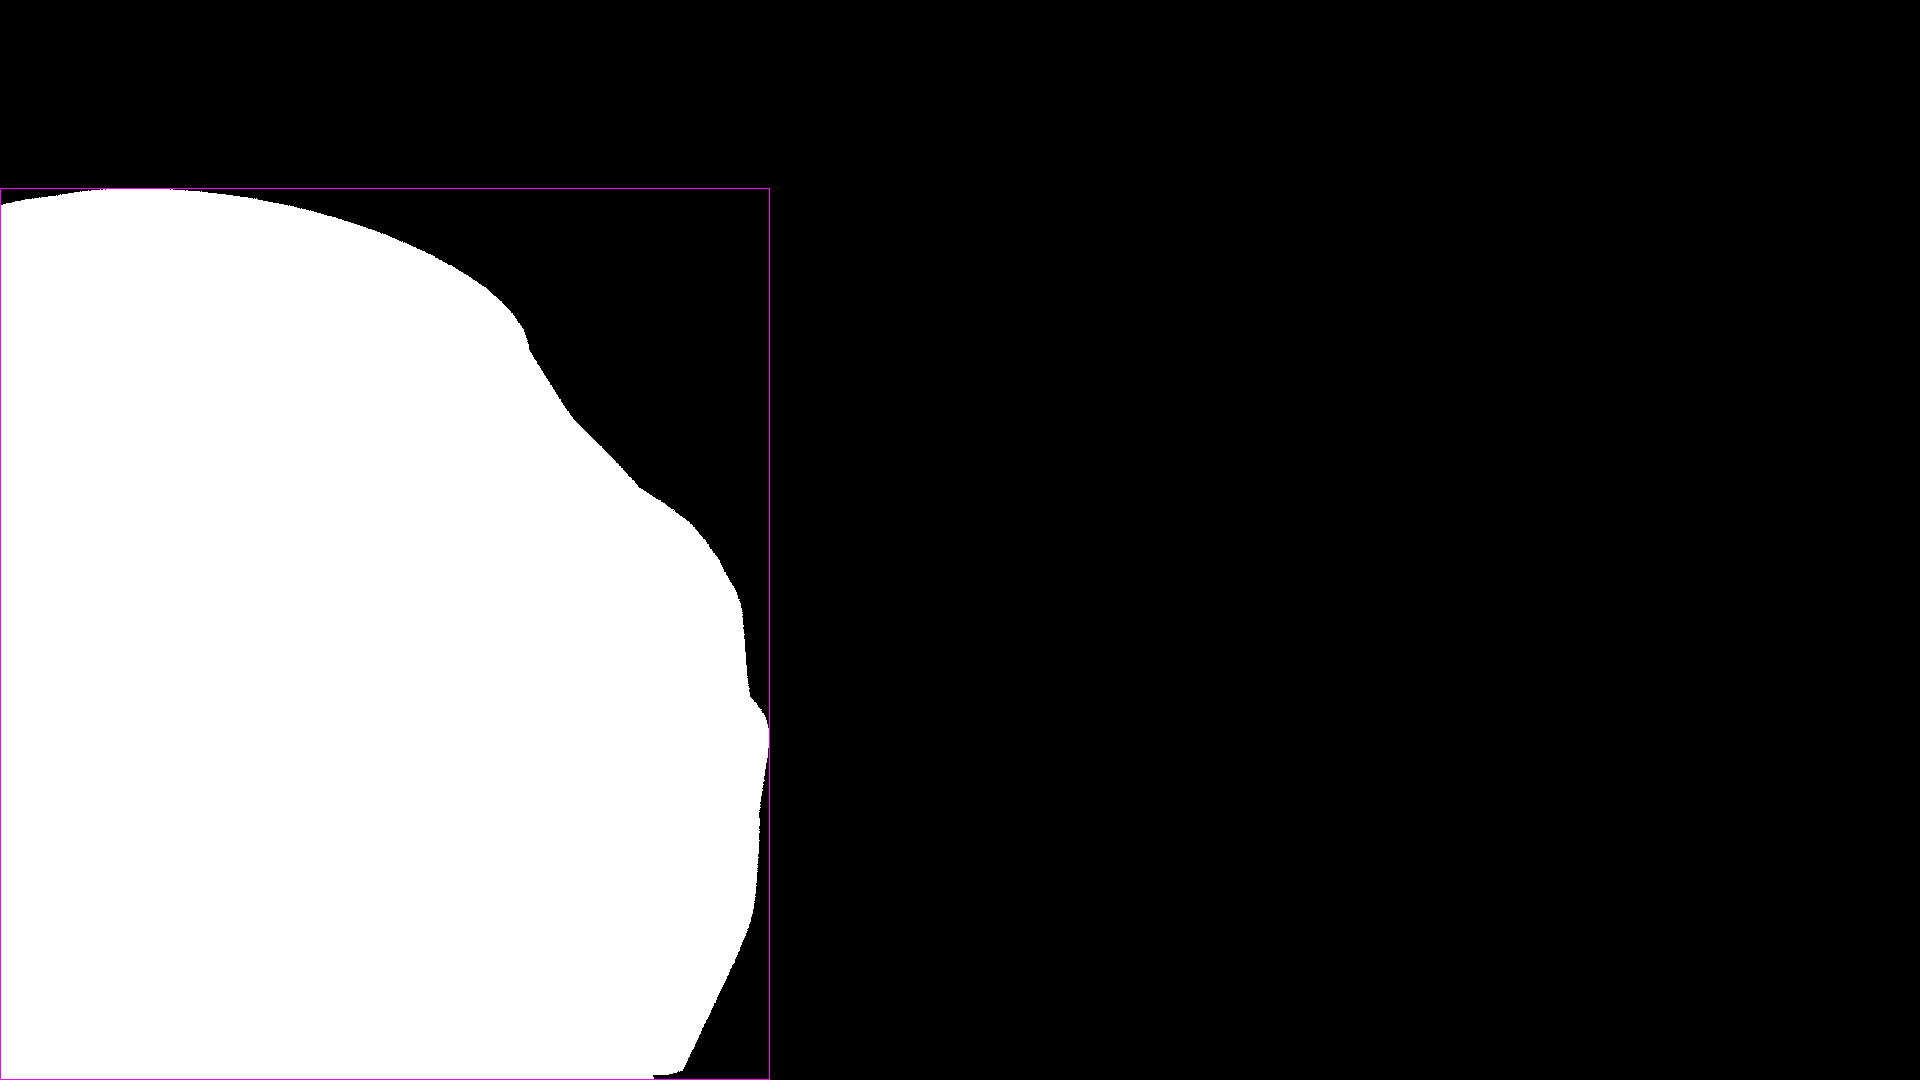


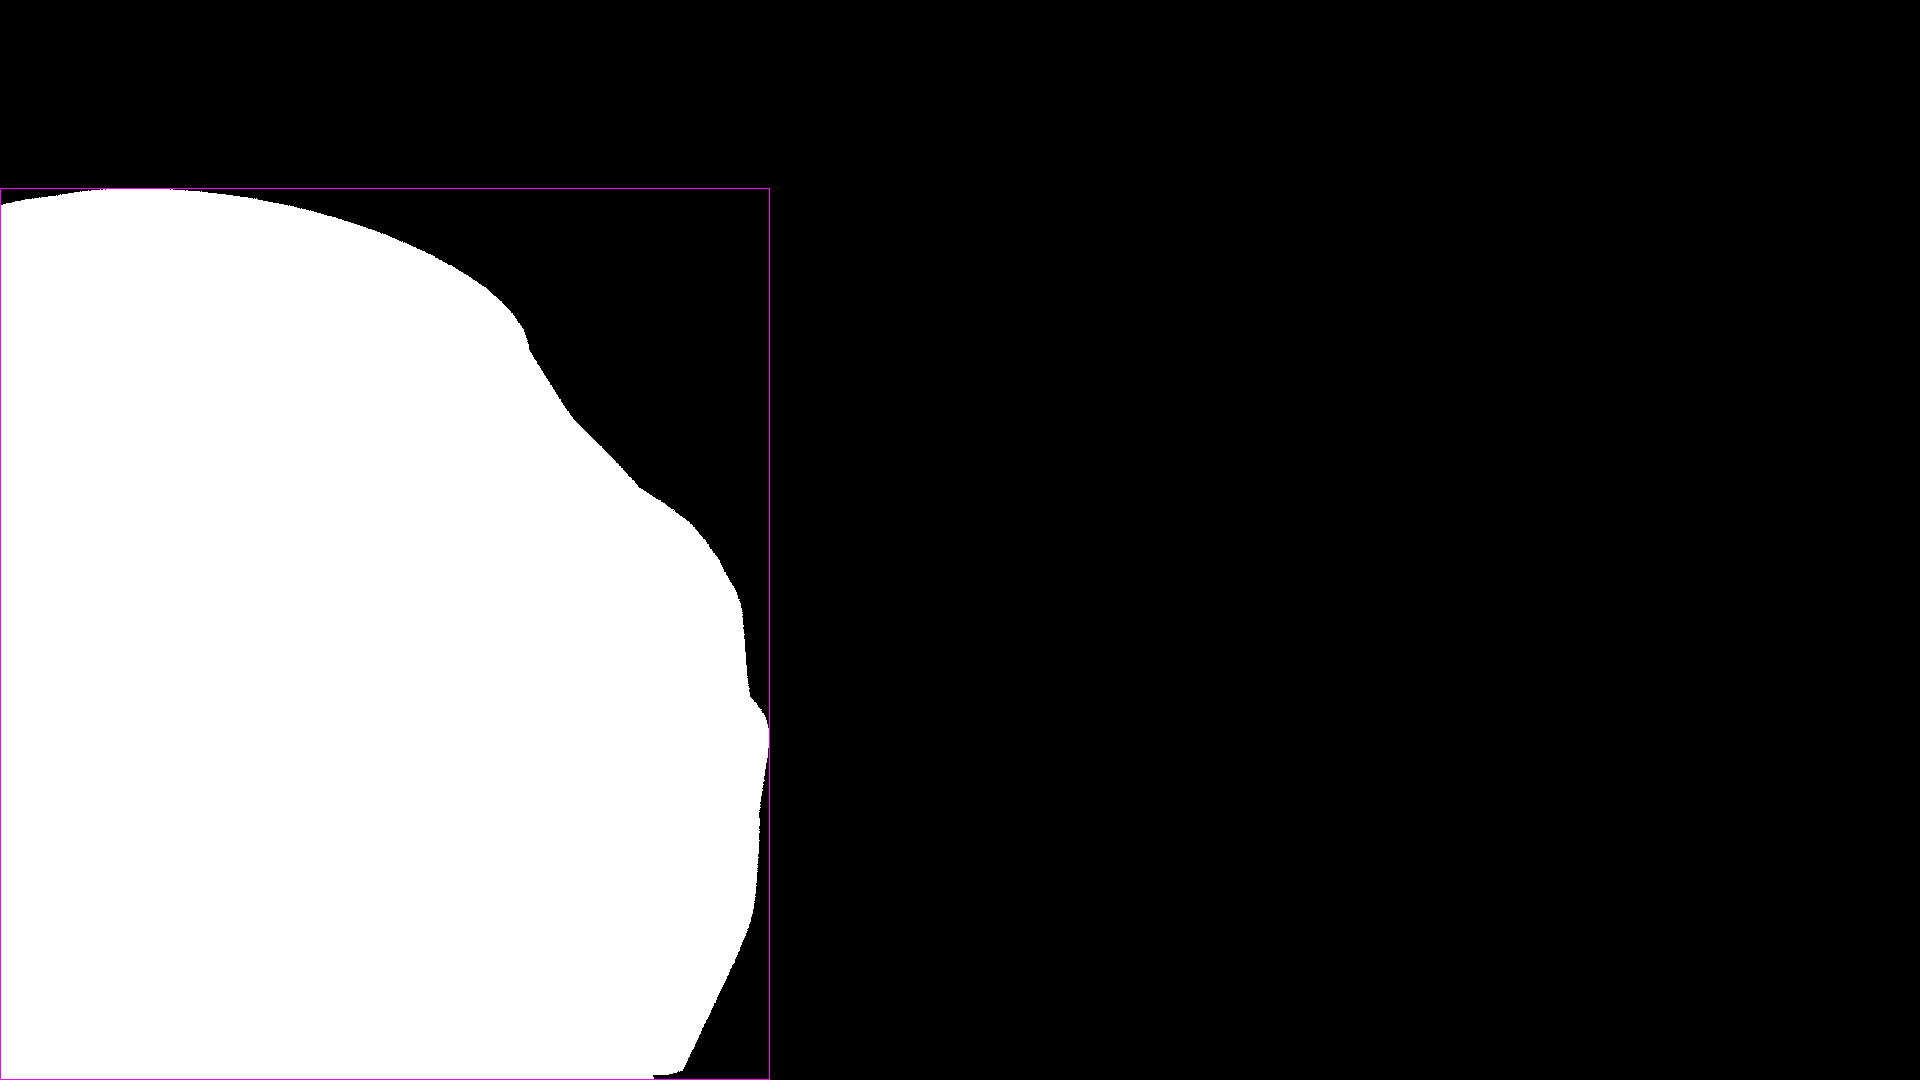

(0, 188, 769, 1079)

In [ ]:
import cv2
import numpy as np
import ipyplot
########## Constants ##################
color = (255, 0, 255) # фиолетовый цвет - boundingbox изображения
thickness = 1 # толщина линии
path_to_mask = "/content/data/materials/blender_scene/dataset/masks/car/2c62c2414cff47dbb0e7df0a118f05d9_frame_0001.png" # Путь к маске изображения автомобиля
#######################################

# Функция получения координат boundingbox из маски изображения
# path_to_mask - путь к маске-изображению
# mask_threshold - порог отсечения шума вызванного особенностями рендеринга
# visualize - параметр отображения битовой маски и boundingbox после обработки
#  color - параметр цвета boundingbox
#  thickness - параметр толщины boundingbox
def get_bbox(path_to_mask: str, mask_threshold: int=10, visualize: bool=True, color: tuple=(255, 0, 255), thickness: int=1)->None:
        image = cv2.imread(path_to_mask)
        # Получение bitmask
        bitmask =  image[:, :, 0].copy()
        bitmask[np.where(bitmask <= mask_threshold)] = 0
        bitmask[np.where(bitmask > mask_threshold)] = 1
        # Получение координат boundingbox
        points =  np.where(bitmask == 1)
        xmin = int(np.min(points[1]))
        xmax = int(np.max(points[1]))
        ymin = int(np.min(points[0]))
        ymax = int(np.max(points[0]))
        # Визуализация
        if visualize:
            _ , width, _ = image.shape
            image[np.where(image <= mask_threshold)] = 0
            image[np.where(image > mask_threshold)] = 255
            # Отображение полученного boundingbox
            image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
            ipyplot.plot_images([image], max_images=1, img_width = width//2)
        return (xmin, ymin, xmax, ymax)

get_bbox(path_to_mask)

<b><i><font color="green">Задание к самостоятельной проработке:<br> 
        &emsp;&emsp;&emsp;&emsp;1. Написать функцию получения разметки из всех классов синтезированных в Blender <br>
</font></i></b><br>


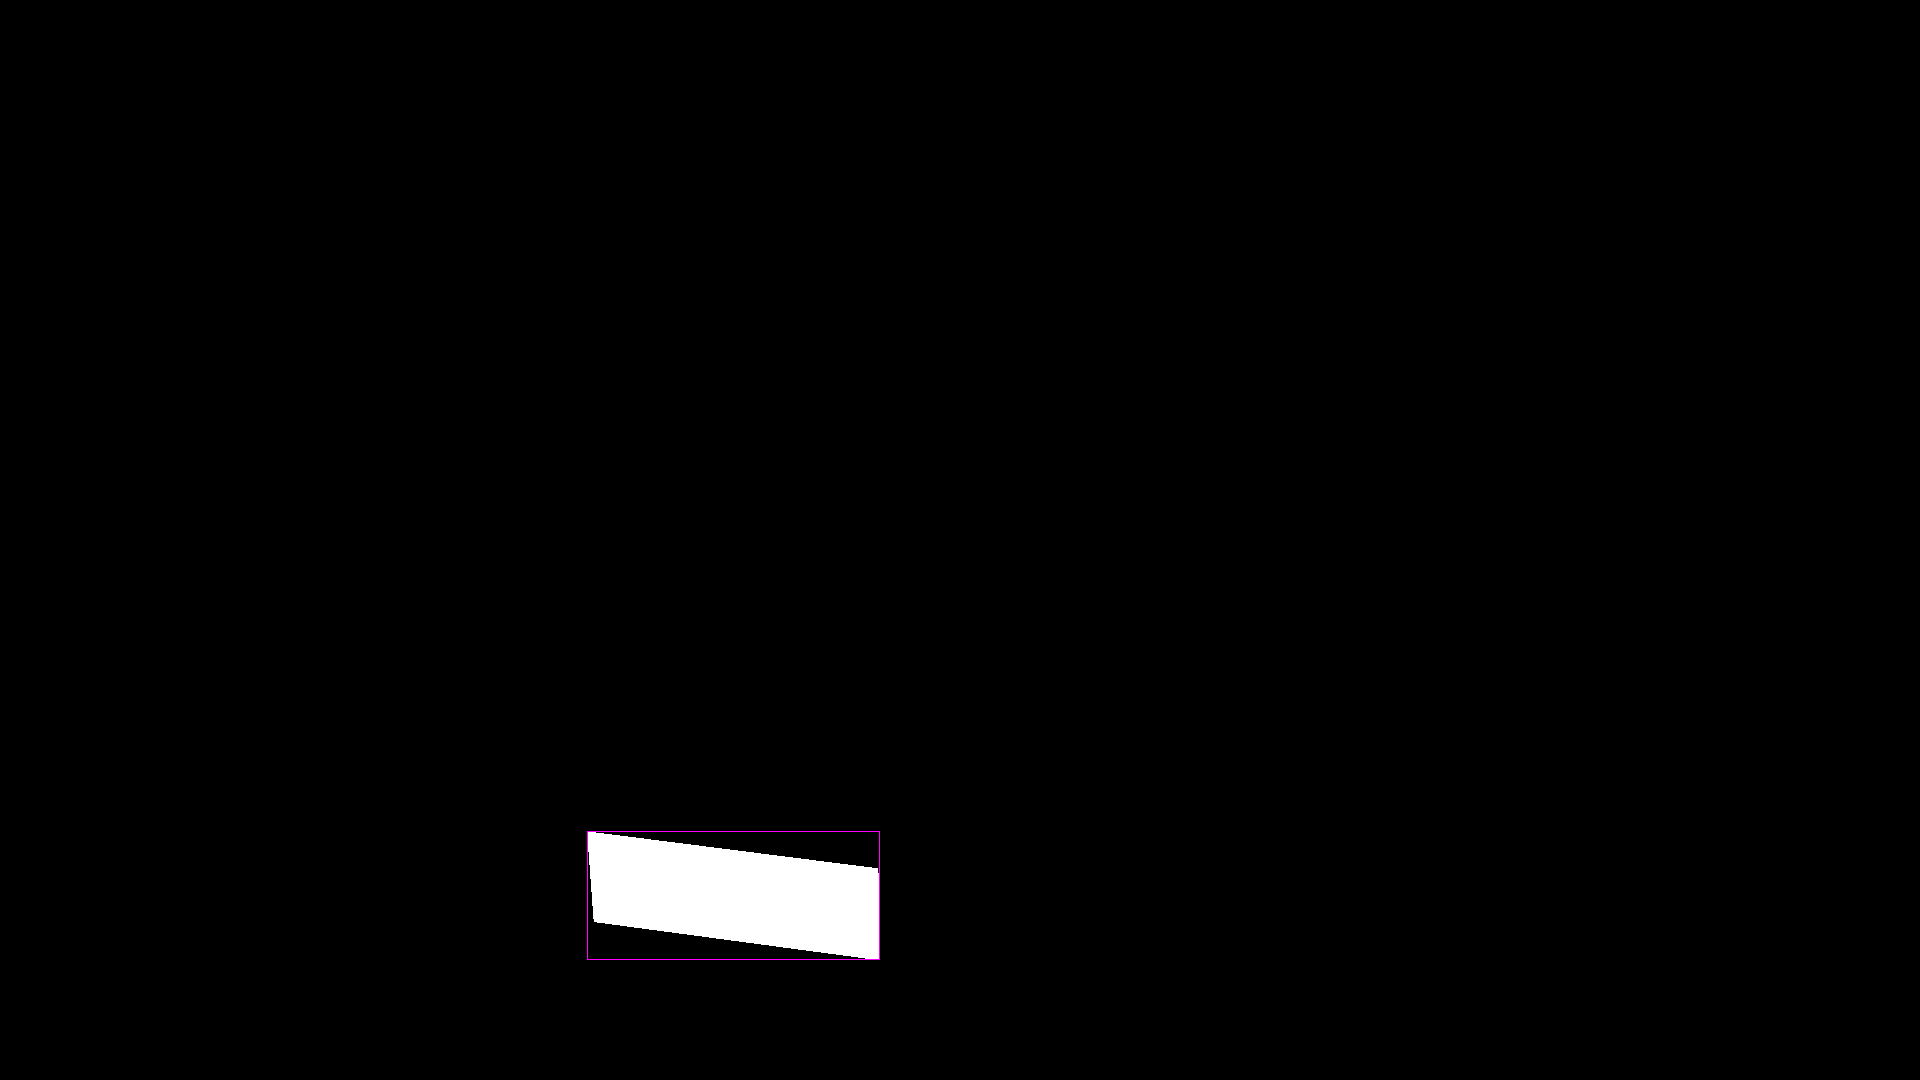


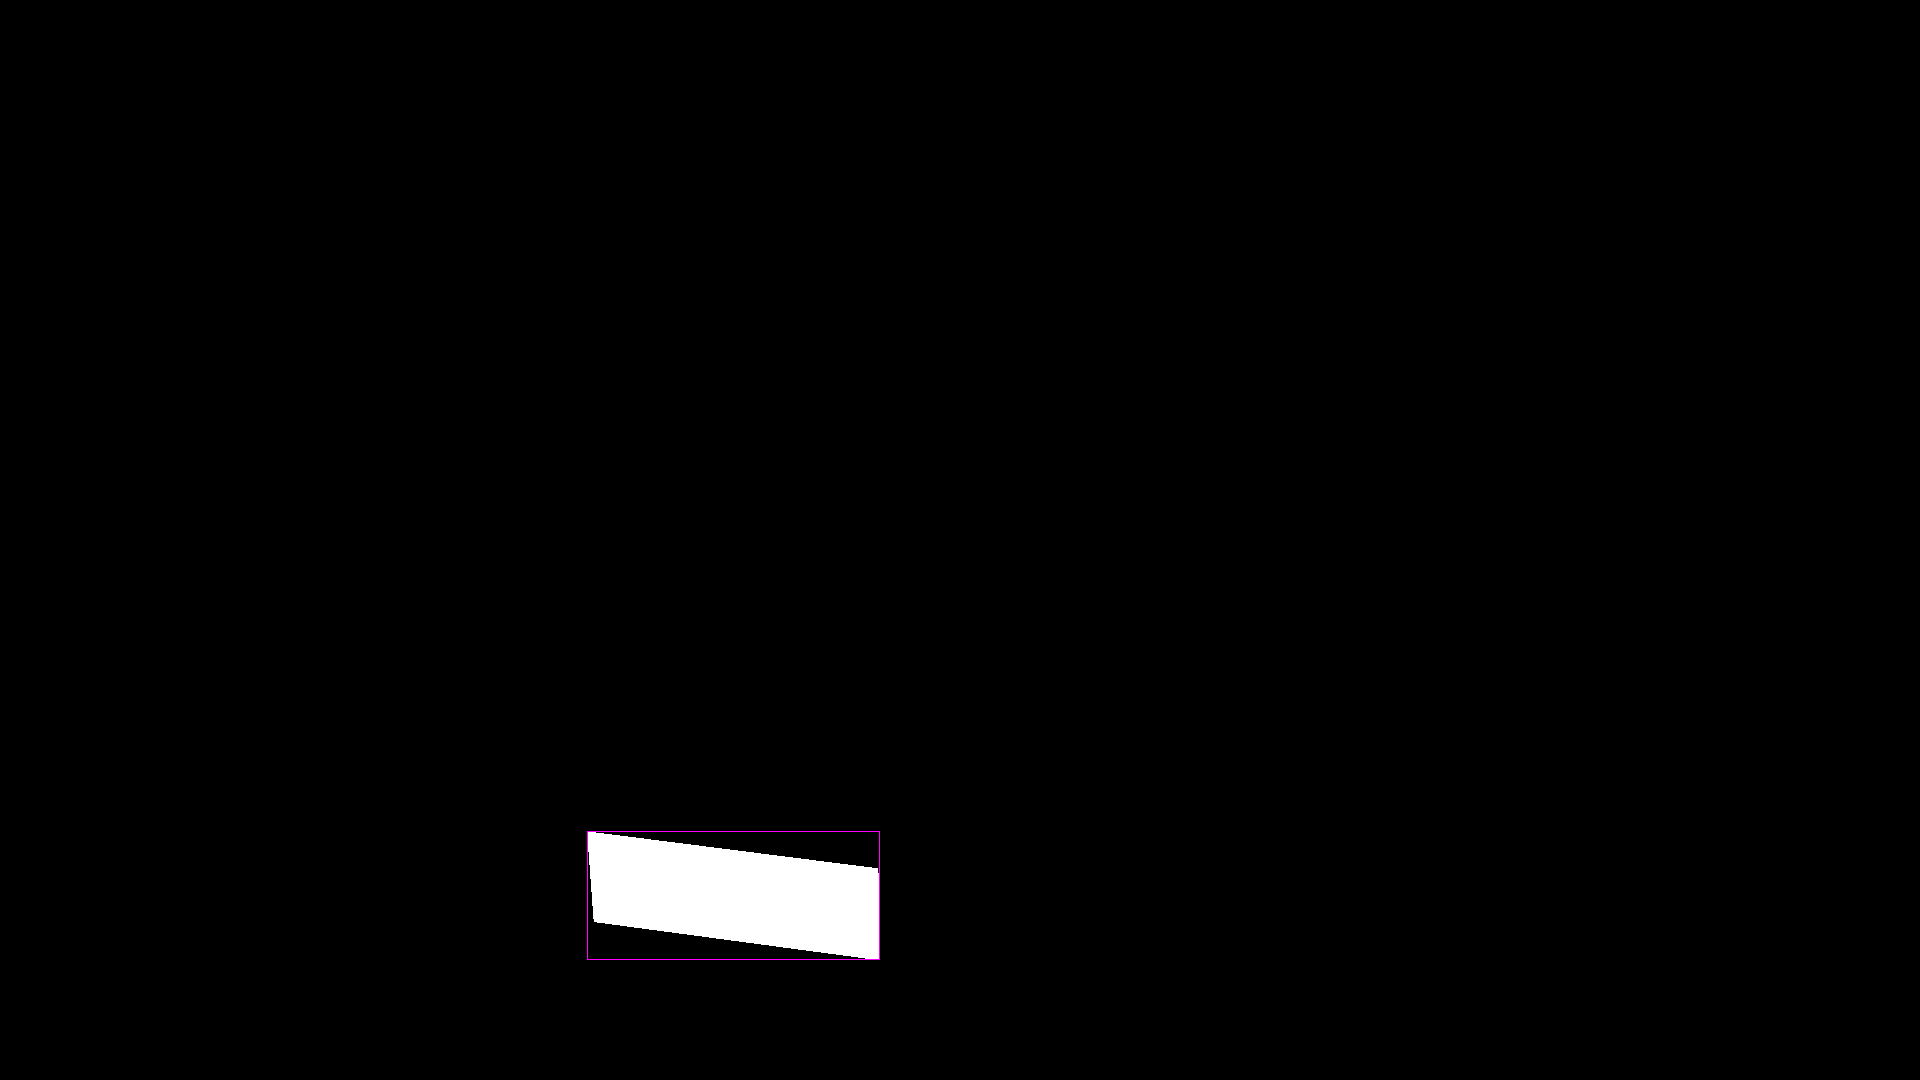

(587, 831, 879, 959)

In [ ]:
path_to_mask = "/content/data/materials/blender_scene/dataset/masks/license_plate/Image0134.png"
get_bbox(path_to_mask)